In [1]:
libname titan "/folders/myfolders/";

SAS Connection established. Subprocess id is 4247



In [2]:
FILENAME REFFILE '/folders/myfolders/sasuser.v94/train.csv';

PROC IMPORT DATAFILE=REFFILE
DBMS=CSV
OUT=titan.train;
RUN;

In [3]:
proc contents data=titan.train;
run;

In [4]:
proc contents data=titan.train;
run;

In [5]:
proc sgplot data=titan.train;
vbar survived / datalabel missing;
label survived="Survived";
run;


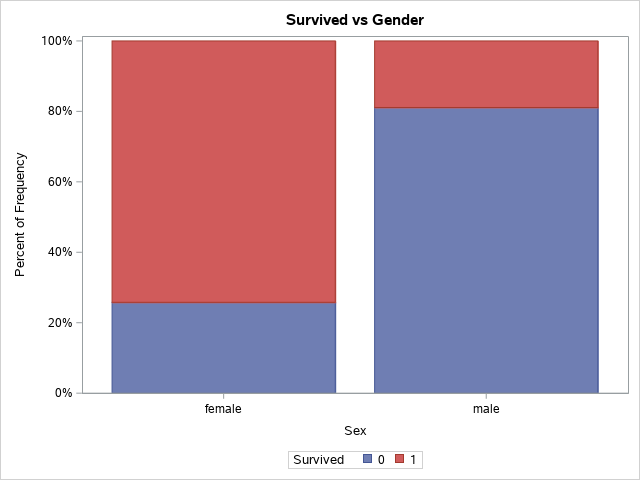

In [6]:
title "Survived vs Gender";
proc sgplot data=titan.train pctlevel=group;
vbar sex / group=Survived stat=percent missing;
label Embarked="Gender of Survived";
run;

In [7]:
proc means data=titan.train N Nmiss mean std min p1 p5 p10 p25 p50 p75 p90 p95 p99 max;
run;

In [8]:
title "Frequency tables for categorical variables in the training set";
proc freq data=titan.train nlevels;
tables Survived; tables Sex; tables Pclass; tables SibSp; tables Parch; tables Embarked; tables Cabin;
run;


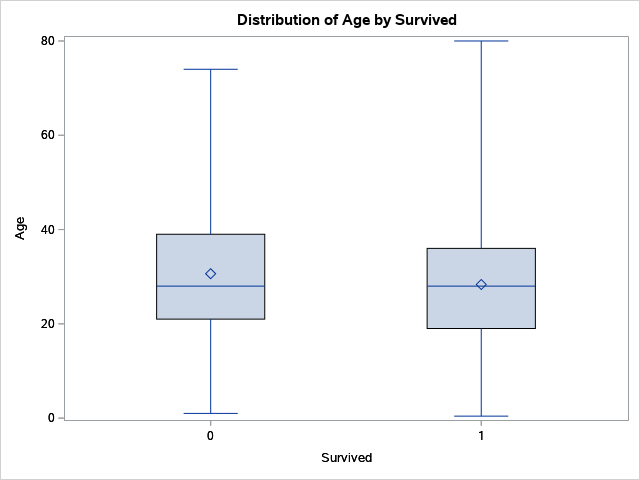

In [9]:
proc sort data=titan.train out=sorted;
by survived descending Age;
run;
title 'Box Plot for Age vs Survived';
proc boxplot data=sorted;
plot Age * Survived;
run;

In [10]:
data titan.train2;
set titan.train;
if age='.' and Pclass=1 then age=37;
else if age='.' and Pclass=2 then age=29;
else if age='.' and Pclass=3 then age=24;
run;

In [11]:
proc means data=titan.train2 N Nmiss;
run;

In [12]:
proc sort data=titan.train out=train_sorted;
by Survived;
run;
proc surveyselect data=train_sorted out=train_survey outall
samprate=0.7 seed=12345;
strata Survived;
run;